In [ ]:
import pandas as pd
from scipy.stats import shapiro

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/RELI Historical Data.csv')

In [ ]:
df=df.drop(['Vol.', 'Low', 'High', 'Open'], axis=1)

In [ ]:
df['Date']=pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df=df.sort_index(ascending=True)

In [ ]:
df['Price']=df['Price'].str.replace(',', '')
df['Price']=pd.to_numeric(df['Price'], errors='coerce')

In [ ]:
df.head()

,Price,Change %
Date,,
2024-12-10,1284.85,-0.80%
2024-12-11,1278.20,-0.52%
2024-12-12,1262.90,-1.20%
2024-12-13,1272.85,0.79%
2024-12-16,1268.30,-0.36%


In [ ]:
df['change']=df['Price']/df['Price'].shift(1)

In [ ]:
df=df.drop('Change %', axis=1)

In [ ]:
df.head()

,Price,change
Date,,
2024-12-10,1284.85,NaN
2024-12-11,1278.20,0.994824
2024-12-12,1262.90,0.988030
2024-12-13,1272.85,1.007879
2024-12-16,1268.30,0.996425


In [217]:
import numpy as np
data=np.random.normal(loc=0, scale=1, size=1000)

In [228]:
# Sapiro wilk normality test

change= df1['change'].dropna()
stat, p_value=shapiro(change)
print(p_value)
if p_value>0.05:
  print('normal distribution is there')
else:
  print('normal distribution is not there')

NameError: name 'df1' is not defined

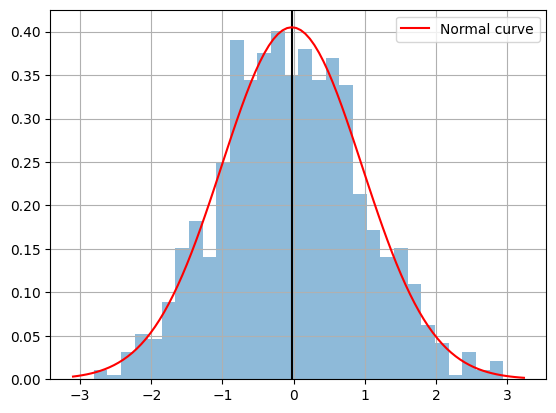

approximately normal


In [223]:
# histograms

import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

plt.hist(change, bins=30, density=True, alpha=0.5)

mean=change.mean()
plt.axvline(mean, color='black')
std=change.std()
xmin, xmax=plt.xlim()
x=np.linspace(xmin, xmax, 100)
p=norm.pdf(x, mean, std)
plt.plot(x, p, 'r', label='Normal curve')
plt.legend()
plt.grid(True)
plt.show()
print('approximately normal')

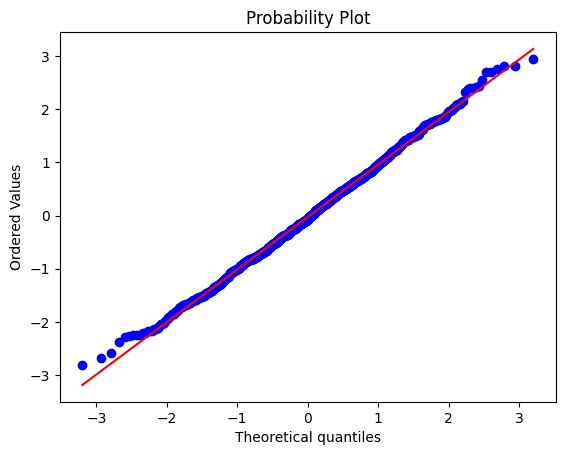

Normal distribution


In [224]:
# Q_Q plot

import scipy.stats as stats
stats.probplot(change, dist='norm', plot=plt)
plt.show()
print('Normal distribution')

In [225]:
# Kolmogorov-Smirnov

from scipy.stats import kstest
stat, pvaluekstest=kstest(change, 'norm', args=(mean, std))
print(kstest(change, 'norm', args=(mean, std)))
if pvaluekstest>0.05:
  print('Normal distribution')

KstestResult(statistic=np.float64(0.01924448239164589), pvalue=np.float64(0.8455937147116432), statistic_location=np.float64(-0.3588170516793854), statistic_sign=np.int8(1))
Normal distribution


In [226]:
# jarque Bera

from scipy.stats import jarque_bera
stat, pjarque= jarque_bera(change)

print(jarque_bera(change))

if pjarque>0.05:
  print('Normal distribution')
else:
  print('Not Normal distribution')

SignificanceResult(statistic=np.float64(3.3203722435231344), pvalue=np.float64(0.19010359439272878))
Normal distribution


In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/MAZG Historical Data.csv',  index_col='Date', parse_dates=True)
df2=df2.sort_index(ascending=True)

<ipython-input-206-2916280604>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2=pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/MAZG Historical Data.csv',  index_col='Date', parse_dates=True)


In [ ]:
df2

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-01-03,141.82,142.95,142.95,140.53,682.30K,1.74%
2022-01-04,143.97,142.82,144.53,141.90,1.26M,1.52%
2022-01-05,145.62,144.20,146.70,143.45,1.39M,1.15%
2022-01-06,139.70,141.15,141.75,139.10,992.41K,-4.07%
2022-01-07,139.22,140.00,141.85,138.00,1.01M,-0.34%
...,...,...,...,...,...,...
2024-12-24,"2,314.75","2,345.98","2,391.90","2,276.00",3.15M,-0.96%
2024-12-26,"2,364.88","2,325.00","2,425.00","2,311.00",6.20M,2.17%
2024-12-27,"2,317.40","2,375.00","2,392.50","2,292.20",2.63M,-2.01%


In [ ]:
df2['Price']=df2['Price'].str.replace(',', '')
df2['Price']=pd.to_numeric(df2['Price'], errors='coerce')

In [ ]:
df2

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-01-03,141.82,142.95,142.95,140.53,682.30K,1.74%
2022-01-04,143.97,142.82,144.53,141.90,1.26M,1.52%
2022-01-05,145.62,144.20,146.70,143.45,1.39M,1.15%
2022-01-06,139.70,141.15,141.75,139.10,992.41K,-4.07%
2022-01-07,139.22,140.00,141.85,138.00,1.01M,-0.34%
...,...,...,...,...,...,...
2024-12-24,2314.75,"2,345.98","2,391.90","2,276.00",3.15M,-0.96%
2024-12-26,2364.88,"2,325.00","2,425.00","2,311.00",6.20M,2.17%
2024-12-27,2317.40,"2,375.00","2,392.50","2,292.20",2.63M,-2.01%


In [ ]:
df2['change']=df2['Price']/df2['Price'].shift(1)

In [227]:
# check for normality using jarque  bera
from scipy.stats import jarque_bera
df2_stats, df2_pval= jarque_bera(df2['change'].dropna())

if df2_pval<0.05:
  print('Not normal distribution')

Not normal distribution
